In [1]:
import tensorflow as tf
import os
import numpy as np
import warnings

D:\python\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
warnings.filterwarnings('ignore')

### Plastic_bag_label=0 Mineral_water_bottles_label=1

In [3]:
def Get_Files(Plastic_bag_dir,Mineral_water_bottles_dir):
    Plastic_bag=[]
    Plastic_bag_label=[]
    Mineral_water_bottles=[]
    Mineral_water_bottles_label=[]
    
    for file in os.listdir(Plastic_bag_dir):
        Plastic_bag.append(Plastic_bag_dir + file)
        Plastic_bag_label.append(0)
        
    for file in os.listdir(Mineral_water_bottles_dir):
        Mineral_water_bottles.append(Mineral_water_bottles_dir + file)
        Mineral_water_bottles_label.append(1)
        
    image_list = np.hstack((Plastic_bag,Mineral_water_bottles))
    label_list = np.hstack((Plastic_bag_label,Mineral_water_bottles_label))
    temp = np.array([image_list,label_list])
    temp = temp.transpose()
    # 打乱顺序
    np.random.shuffle(temp)

    # 取出第一个元素作为 image 第二个元素作为 label
    image_list = list(temp[:,0])
    label_list = list(temp[:,1])
    label_list = [int(i) for i in label_list]  
    return image_list,label_list

In [4]:
# image_W ,image_H 指定图片大小，batch_size 每批读取的个数 ，capacity队列中 最多容纳元素的个数
def get_batch(image,label,image_W,image_H,batch_size,capacity):
    # 转换数据为 ts 能识别的格式
    image = tf.cast(image,tf.string)
    label = tf.cast(label, tf.int32)

    # 将image 和 label 放倒队列里 
    input_queue = tf.train.slice_input_producer([image,label])
    label = input_queue[1]
    # 读取图片的全部信息
    image_contents = tf.read_file(input_queue[0])
    # 把图片解码，channels ＝3 为彩色图片, r，g ，b  黑白图片为 1 ，也可以理解为图片的厚度
    image = tf.image.decode_jpeg(image_contents,channels =3)
    # 将图片以图片中心进行裁剪或者扩充为 指定的image_W，image_H
    image = tf.image.resize_images(image, [image_W, image_H],method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    # 对数据进行标准化,标准化，就是减去它的均值，除以他的方差
    image = tf.image.per_image_standardization(image)

    # 生成批次  num_threads 有多少个线程根据电脑配置设置  capacity 队列中 最多容纳图片的个数  tf.train.shuffle_batch 打乱顺序，
    image_batch, label_batch = tf.train.batch([image, label],batch_size = batch_size, num_threads = 4, capacity = capacity)

    # 重新定义下 label_batch 的形状
    label_batch = tf.reshape(label_batch , [batch_size])
    # 转化图片
    image_batch = tf.cast(image_batch,tf.float32)
    return  image_batch, label_batch

In [5]:
Plastic_bag_dir='./Plastic_bag/'
Mineral_water_bottles_dir='./Mineral_water_bottles/'

image_W=208
image_H=208
BATCH_SIZE = 2
CAPACITY = 256 

N_CLASSES = 2  # 2个输出神经元，［1，0］ 或者 ［0，1］猫和狗的概率
BATCH_SIZE = 8  # 每批数据的大小
IMG_W = 208  # 重新定义图片的大小，图片如果过大则训练比较慢  
IMG_H = 208  
CAPACITY = 256  
MAX_STEP = 100 # 训练的步数，应当 >= 10000
learning_rate = 0.0001 # 学习率，建议刚开始的 learning_rate <= 0.0001

In [6]:
image_list,label_list=Get_Files(Plastic_bag_dir,Mineral_water_bottles_dir)
print(image_list,label_list)

image_batch, label_batch=get_batch(image_list,label_list,image_W,image_H,BATCH_SIZE,CAPACITY)
print(image_batch, label_batch)

['./Plastic_bag/塑料袋63.jpg', './Plastic_bag/塑料袋72.jpg', './Mineral_water_bottles/矿泉水瓶1.jpeg', './Mineral_water_bottles/矿泉水瓶81.jpg', './Plastic_bag/塑料袋33.jpg', './Mineral_water_bottles/矿泉水瓶80.jpg', './Plastic_bag/塑料袋57.jpg', './Plastic_bag/塑料袋61.jpg', './Mineral_water_bottles/矿泉水瓶21.jpg', './Plastic_bag/塑料袋40.jpg', './Mineral_water_bottles/矿泉水瓶89.jpg', './Mineral_water_bottles/矿泉水瓶2.jpeg', './Mineral_water_bottles/矿泉水瓶30.jpg', './Mineral_water_bottles/矿泉水瓶19.jpeg', './Plastic_bag/塑料袋31.jpg', './Mineral_water_bottles/矿泉水瓶56.jpg', './Plastic_bag/塑料袋85.jpg', './Mineral_water_bottles/矿泉水瓶47.jpg', './Mineral_water_bottles/矿泉水瓶73.jpg', './Plastic_bag/塑料袋21.jpg', './Plastic_bag/塑料袋37.jpg', './Plastic_bag/塑料袋2.jpeg', './Plastic_bag/塑料袋47.jpg', './Mineral_water_bottles/矿泉水瓶95.jpg', './Plastic_bag/塑料袋12.jpeg', './Plastic_bag/塑料袋70.jpg', './Mineral_water_bottles/矿泉水瓶104.jpg', './Mineral_water_bottles/矿泉水瓶15.jpeg', './Plastic_bag/塑料袋48.jpg', './Mineral_water_bottles/矿泉水瓶105.jpg', './Plastic_bag/塑料袋5

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.batch(batch_size)` (or `padded_batch(...)` if `dynamic_pad=True`).
Tensor("batch:0", shape=(8, 208, 208, 3), dtype=float32) Tensor("Reshape:0", shape=(8,), dtype=int32)


### 卷积层

In [7]:
def inference(images, batch_size, n_classes):  
    with tf.variable_scope('conv1',reuse=tf.AUTO_REUSE) as scope: 
     # 卷积盒的为 3*3 的卷积盒，图片厚度是3，输出是16个featuremap
        weights = tf.get_variable('weights',  
                                  shape=[3, 3, 3, 16],  
                                  dtype=tf.float32,  
                                  initializer=tf.truncated_normal_initializer(stddev=0.1, dtype=tf.float32))  
        biases = tf.get_variable('biases',  
                                 shape=[16],  
                                 dtype=tf.float32,  
                                 initializer=tf.constant_initializer(0.1))  
        conv = tf.nn.conv2d(images, weights, strides=[1, 1, 1, 1], padding='SAME')  
        pre_activation = tf.nn.bias_add(conv, biases)  
        conv1 = tf.nn.relu(pre_activation, name=scope.name)  
  
    with tf.variable_scope('pooling1_lrn',reuse=tf.AUTO_REUSE) as scope:  
            pool1 = tf.nn.max_pool(conv1, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME', name='pooling1')  
            norm1 = tf.nn.lrn(pool1, depth_radius=4, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name='norm1')  
  
    with tf.variable_scope('conv2',reuse=tf.AUTO_REUSE) as scope:  
                weights = tf.get_variable('weights',  
                                          shape=[3, 3, 16, 16],  
                                          dtype=tf.float32,  
                                          initializer=tf.truncated_normal_initializer(stddev=0.1, dtype=tf.float32))  
                biases = tf.get_variable('biases',  
                                         shape=[16],  
                                         dtype=tf.float32,  
                                         initializer=tf.constant_initializer(0.1))  
                conv = tf.nn.conv2d(norm1, weights, strides=[1, 1, 1, 1], padding='SAME')  
                pre_activation = tf.nn.bias_add(conv, biases)  
                conv2 = tf.nn.relu(pre_activation, name='conv2')  
  
    # pool2 and norm2  
    with tf.variable_scope('pooling2_lrn',reuse=tf.AUTO_REUSE) as scope:  
        norm2 = tf.nn.lrn(conv2, depth_radius=4, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name='norm2')  
        pool2 = tf.nn.max_pool(norm2, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='SAME', name='pooling2')  
  
    with tf.variable_scope('local3',reuse=tf.AUTO_REUSE) as scope:  
        reshape = tf.reshape(pool2, shape=[batch_size, -1])  
        dim = reshape.get_shape()[1].value  
        weights = tf.get_variable('weights',  
                                  shape=[dim, 128],  
                                  dtype=tf.float32,  
                                  initializer=tf.truncated_normal_initializer(stddev=0.005, dtype=tf.float32))  
        biases = tf.get_variable('biases',  
                                 shape=[128],  
                                 dtype=tf.float32,  
                                 initializer=tf.constant_initializer(0.1))  
    local3 = tf.nn.relu(tf.matmul(reshape, weights) + biases, name=scope.name)  
  
    # local4  
    with tf.variable_scope('local4',reuse=tf.AUTO_REUSE) as scope:  
        weights = tf.get_variable('weights',  
                                  shape=[128, 128],  
                                  dtype=tf.float32,  
                                  initializer=tf.truncated_normal_initializer(stddev=0.005, dtype=tf.float32))  
        biases = tf.get_variable('biases',  
                                 shape=[128],  
                                 dtype=tf.float32,  
                                 initializer=tf.constant_initializer(0.1))  
        local4 = tf.nn.relu(tf.matmul(local3, weights) + biases, name='local4')  
  
    # softmax  
    with tf.variable_scope('softmax_linear',reuse=tf.AUTO_REUSE) as scope:  
        weights = tf.get_variable('softmax_linear',  
                                  shape=[128, n_classes],  
                                  dtype=tf.float32,  
                                  initializer=tf.truncated_normal_initializer(stddev=0.005, dtype=tf.float32))  
        biases = tf.get_variable('biases',  
                                 shape=[n_classes],  
                                 dtype=tf.float32,  
                                 initializer=tf.constant_initializer(0.1))  
        softmax_linear = tf.add(tf.matmul(local4, weights), biases, name='softmax_linear')  
  
    return softmax_linear  
  
  
  
def losses(logits, labels):  
    with tf.variable_scope('loss') as scope:  
        cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits \
                        (logits=logits, labels=labels, name='xentropy_per_example')  
        loss = tf.reduce_mean(cross_entropy, name='loss')  
        tf.summary.scalar(scope.name + '/loss', loss)  
    return loss  
  
def trainning(loss, learning_rate):  
    with tf.name_scope('optimizer'):  
        optimizer = tf.train.AdamOptimizer(learning_rate= learning_rate)  
        global_step = tf.Variable(0, name='global_step', trainable=False)  
        train_op = optimizer.minimize(loss, global_step= global_step)  
    return train_op  
  
def evaluation(logits, labels):  
    with tf.variable_scope('accuracy') as scope:  
        correct = tf.nn.in_top_k(logits, labels, 1)  
        correct = tf.cast(correct, tf.float16)  
        accuracy = tf.reduce_mean(correct)  
        tf.summary.scalar(scope.name + '/accuracy', accuracy)  
    return accuracy

### 模型训练

In [18]:
def run_training():  
    
    logs_train_dir = './saveNet/'  
    
    # 获取图片和标签集
    train, train_label = Get_Files(Plastic_bag_dir,Mineral_water_bottles_dir)
    
    # 生成批次
    train_batch, train_label_batch = get_batch(train,  
                                              train_label,  
                                              IMG_W,  
                                              IMG_H,  
                                              BATCH_SIZE,   
                                              CAPACITY)
    # 进入模型
    train_logits = inference(train_batch, BATCH_SIZE, N_CLASSES) 
    # 获取 loss 
    train_loss = losses(train_logits, train_label_batch)
    # 训练 
    train_op = trainning(train_loss, learning_rate)
    # 获取准确率 
    train__acc = evaluation(train_logits, train_label_batch) 

    # 合并 summary
    summary_op = tf.summary.merge_all()  
    sess = tf.Session()
    

    
    # 保存summary
    train_writer = tf.summary.FileWriter(logs_train_dir, sess.graph)  
    saver = tf.train.Saver()  
      
    sess.run(tf.global_variables_initializer())  
    coord = tf.train.Coordinator()  
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)  
      
    try:  
        for step in np.arange(MAX_STEP):  
            if coord.should_stop():  
                    break  
            _, tra_loss, tra_acc = sess.run([train_op, train_loss, train__acc])  
                 
            if step % 50 == 0:  
                print('Step %d, train loss = %.2f, train accuracy = %.2f%%' %(step, tra_loss, tra_acc*100.0))  
                summary_str = sess.run(summary_op)  
                train_writer.add_summary(summary_str, step)  
                
                
#             if step % 2000 == 0 or (step + 1) == MAX_STEP:  
            if step % 100 == 0 or (step + 1) == MAX_STEP:  
                # 每隔2000步保存一下模型，模型保存在 checkpoint_path 中
                checkpoint_path = os.path.join(logs_train_dir, 'model.ckpt')  
                saver.save(sess, checkpoint_path, global_step=step)  
                  
    except tf.errors.OutOfRangeError:  
        print('Done training -- epoch limit reached')  
    finally:  
        coord.request_stop()
    coord.join(threads)  
    sess.close()  



In [19]:
# 变量重用
tf.get_variable_scope().reuse_variables()

In [ ]:
# train
run_training()

In [ ]:
# 查看所有变量的名字
for tv in tf.trainable_variables():
    print (tv.name)

In [ ]:
acc=tf.get_default_graph().get_tensor_by_name("accuracy/accuracy:0")
print(sess.run(acc))

### 验证

In [21]:
from PIL import Image  
import matplotlib.pyplot as plt

In [56]:
#从训练集中选取一张图片 
def get_one_image(train): 
    files = os.listdir(train) 
#     files = '图片3.jpg'

    n = len(files)
    ind = np.random.randint(0,n)
    img_dir = os.path.join(train,files[ind])  
    image = Image.open(img_dir)  
    image = Image.open(files)  
    plt.imshow(image)
    plt.show()
    image = image.resize([208, 208])  
    image = np.array(image)
    return image  

In [35]:
def evaluate_one_image():  
#     train = './Mineral_water_bottles/'  
    train ='./Plastic_bag/'
    # 获取图片路径集和标签集
    image_array = get_one_image(train)  
      
    with tf.Graph().as_default():  
        BATCH_SIZE = 1  # 因为只读取一副图片 所以batch 设置为1
        N_CLASSES = 2  # 2个输出神经元，［1，0］ 或者 ［0，1］猫和狗的概率
        # 转化图片格式
        image = tf.cast(image_array, tf.float32)  
        # 图片标准化
        image = tf.image.per_image_standardization(image)
        # 图片原来是三维的 [208, 208, 3] 重新定义图片形状 改为一个4D  四维的 tensor
        image = tf.reshape(image, [1, 208, 208, 3])  
        logit = inference(image, BATCH_SIZE, N_CLASSES)  
        # 因为 inference 的返回没有用激活函数，所以在这里对结果用softmax 激活
        logit = tf.nn.softmax(logit)  
        
        # 用最原始的输入数据的方式向模型输入数据 placeholder
        x = tf.placeholder(tf.float32, shape=[208, 208, 3])  
        
        # 我门存放模型的路径
        logs_train_dir = './saveNet/'   
        # 定义saver 
        saver = tf.train.Saver()  
          
        with tf.Session() as sess:  
              
            print("从指定的路径中加载模型。。。。")
            # 将模型加载到sess 中 
            ckpt = tf.train.get_checkpoint_state(logs_train_dir)  
            if ckpt and ckpt.model_checkpoint_path:  
                global_step = ckpt.model_checkpoint_path.split('/')[-1].split('-')[-1]  
                saver.restore(sess, ckpt.model_checkpoint_path)  
                print('模型加载成功, 训练的步数为 %s' % global_step)  
            else:  
                print('模型加载失败，，，文件没有找到')  
            # 将图片输入到模型计算
            prediction = sess.run(logit, feed_dict={x: image_array})
            # 获取输出结果中最大概率的索引
            max_index = np.argmax(prediction)  
            if max_index==0:  
                print('塑料袋概率 %.6f' %prediction[:, 0])  
            else:  
                print('矿泉水瓶的概率 %.6f' %prediction[:, 1]) 

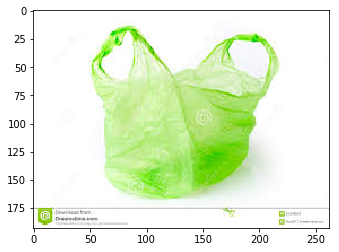

从指定的路径中加载模型。。。。
INFO:tensorflow:Restoring parameters from ./saveNet/model.ckpt-100
模型加载成功, 训练的步数为 100
塑料袋概率 0.983925


In [57]:
# 测试
evaluate_one_image()